In [1]:
# This is to access the package without it being installed for testing.
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
import pandas as pd

In [3]:
from pylossmap.loader import BLMDataFetcher
from pylossmap.data import BLMData
from pylossmap.utils import to_datetime
from pylossmap.utils import row_from_time

/home/lcoyle/anaconda2/envs/loss_maps/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
ts = [{'datetime': '2018-04-13 00:51:26', 'plane': 'V', 'beam': 2},
      {'datetime': '2018-04-18 20:13:29', 'plane': 'V', 'beam': 2},
      
#       {'datetime': '2018-04-13 00:49:23', 'plane': 'H', 'beam': 1},
#       {'datetime': '2017-09-23 08:55:50', 'plane': 'H', 'beam': 1},
      
#       {'datetime': '2018-04-14 20:47:05', 'plane': 'V', 'beam': 1},
#       {'datetime': '2017-09-22 19:41:58', 'plane': 'V', 'beam': 1},
      
#       {'datetime': '2018-04-13 00:50:04', 'plane': 'V', 'beam': 1},
#       {'datetime': '2017-09-23 08:57:25', 'plane': 'V', 'beam': 1},
      
#       {'datetime': '2018-04-13 00:51:02', 'plane': 'H', 'beam': 2},
#       {'datetime': '2017-09-23 08:59:53', 'plane': 'H', 'beam': 2},
     ]
look_back = pd.Timedelta('5S')
look_forward = pd.Timedelta('5S')

In [5]:
fetcher = BLMDataFetcher()

/home/lcoyle/anaconda2/envs/loss_maps/lib/python3.7/site-packages/pandas/core/indexes/base.py:3071: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  target = np.asarray(target)


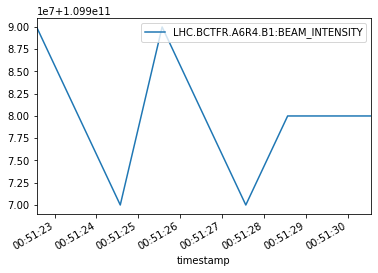

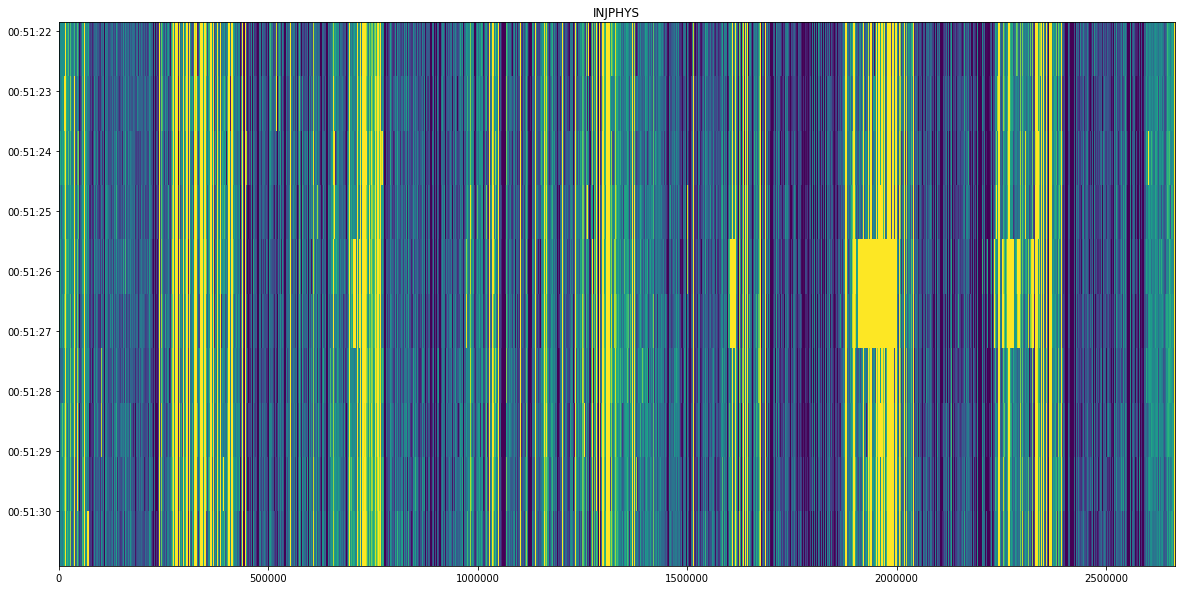

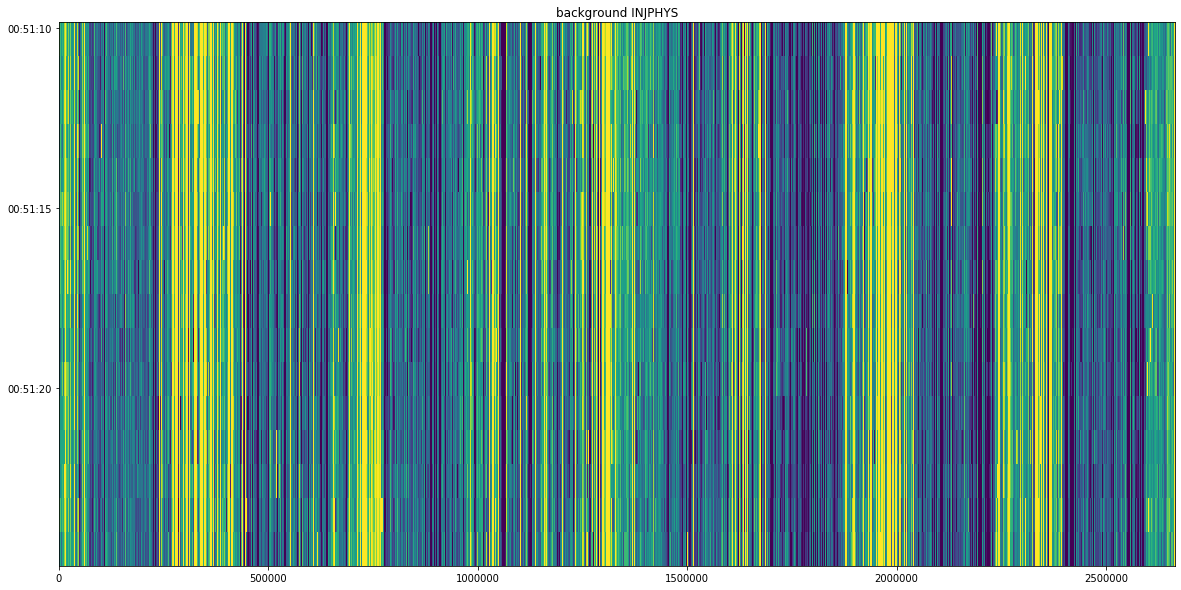

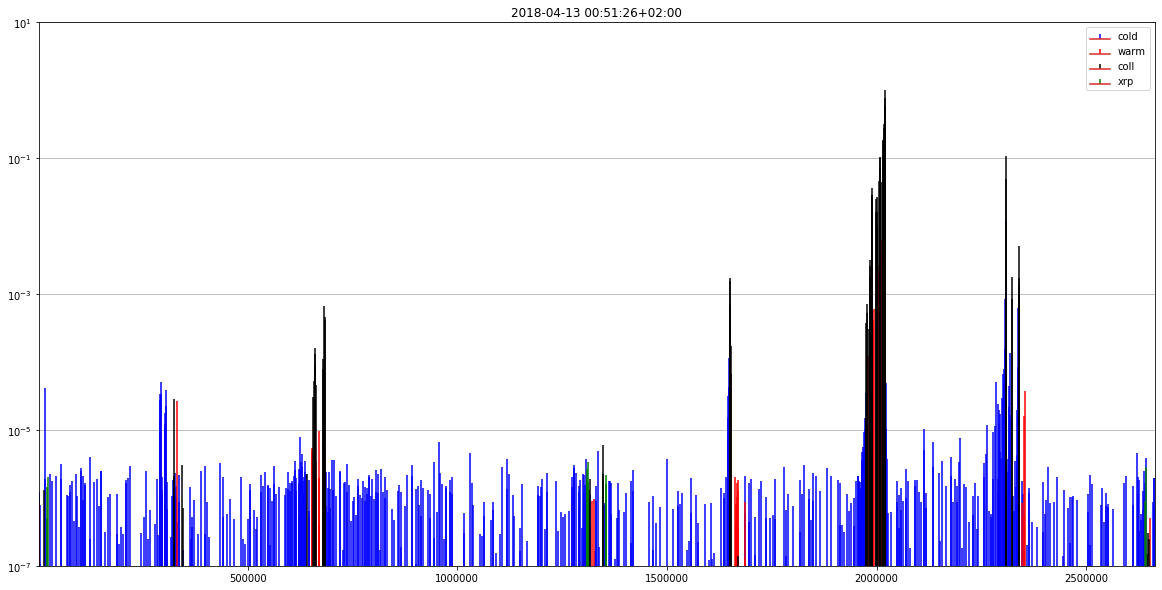

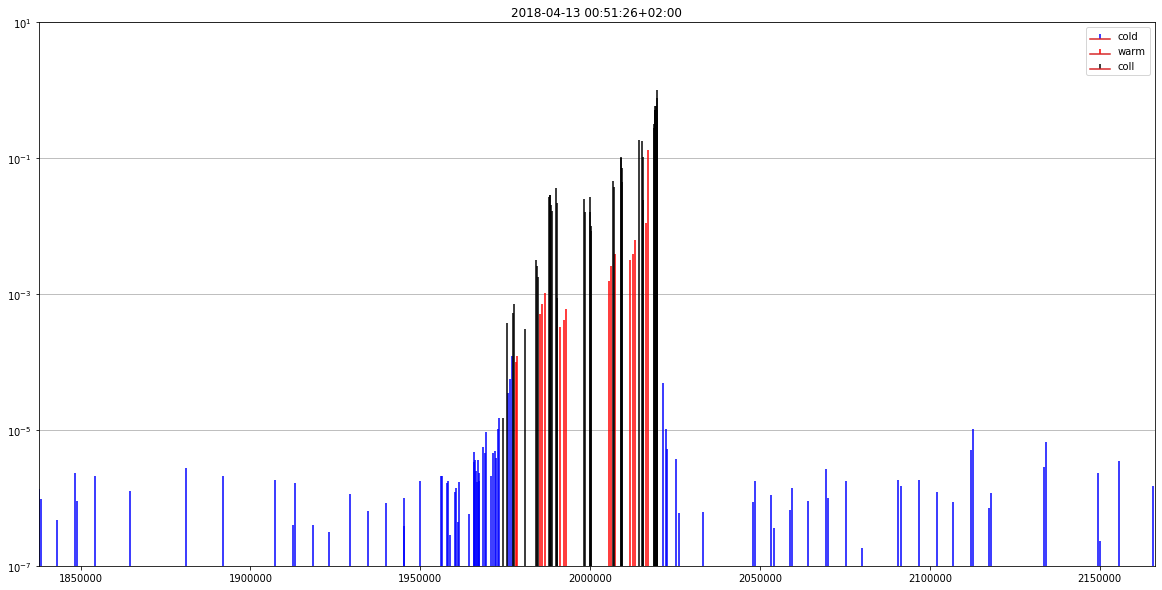

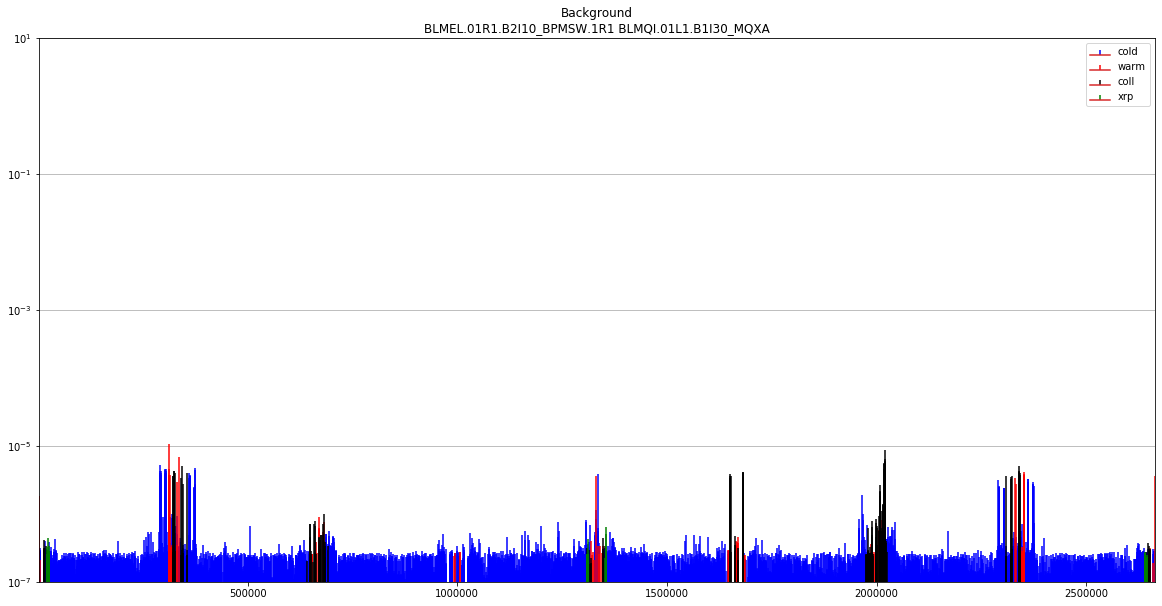

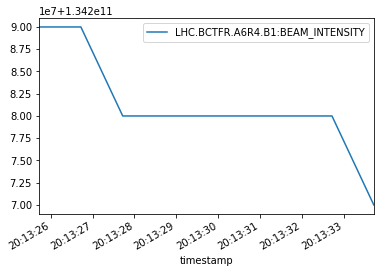

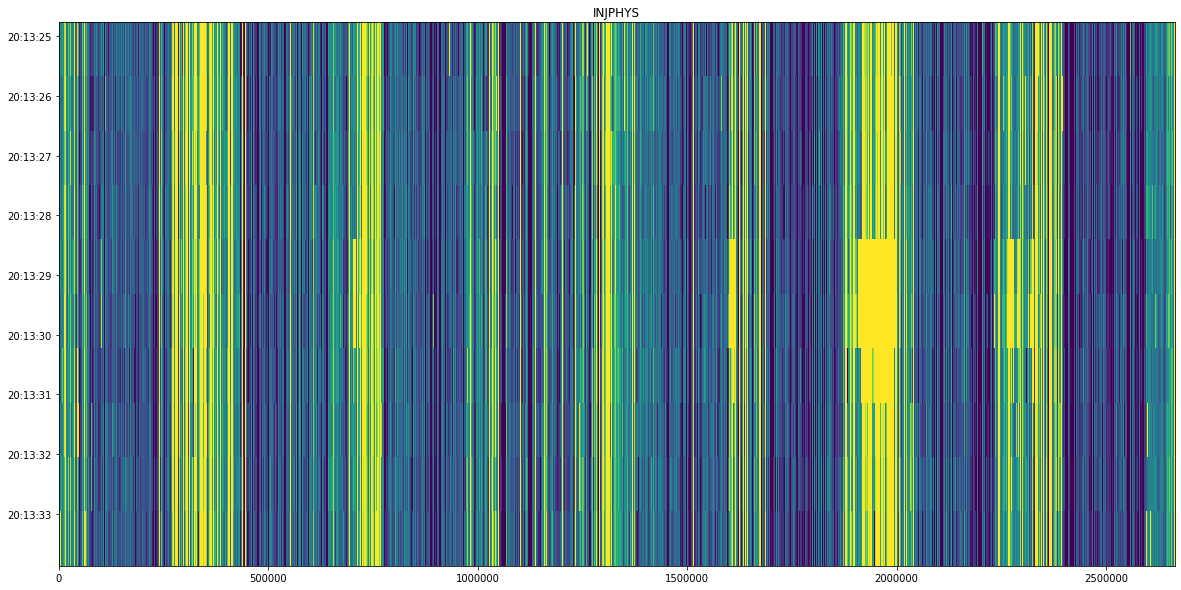

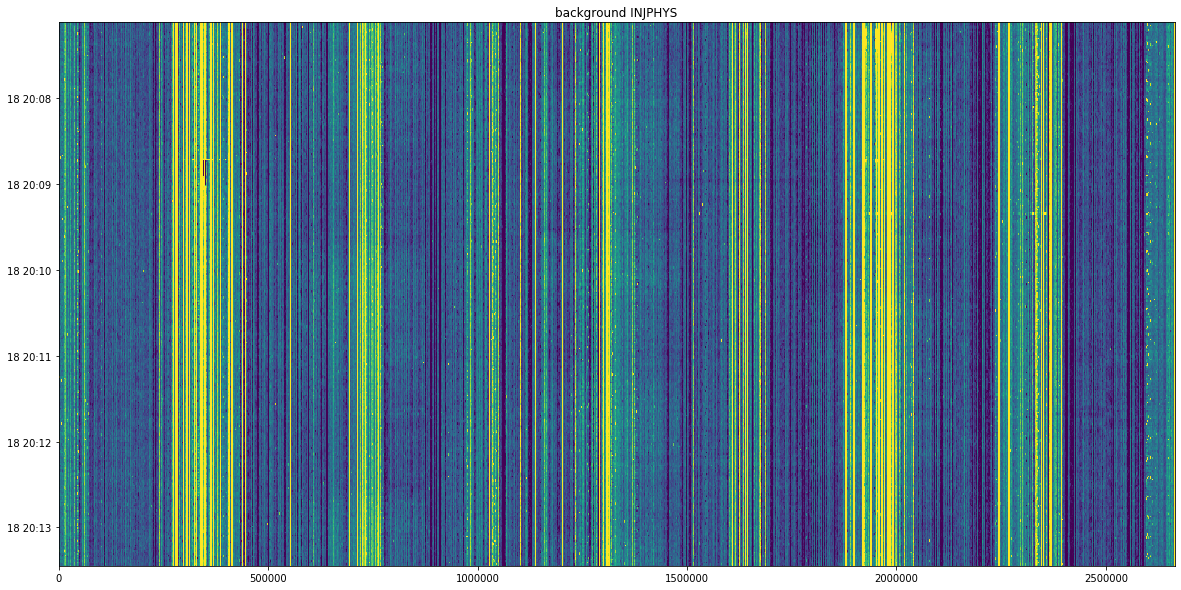

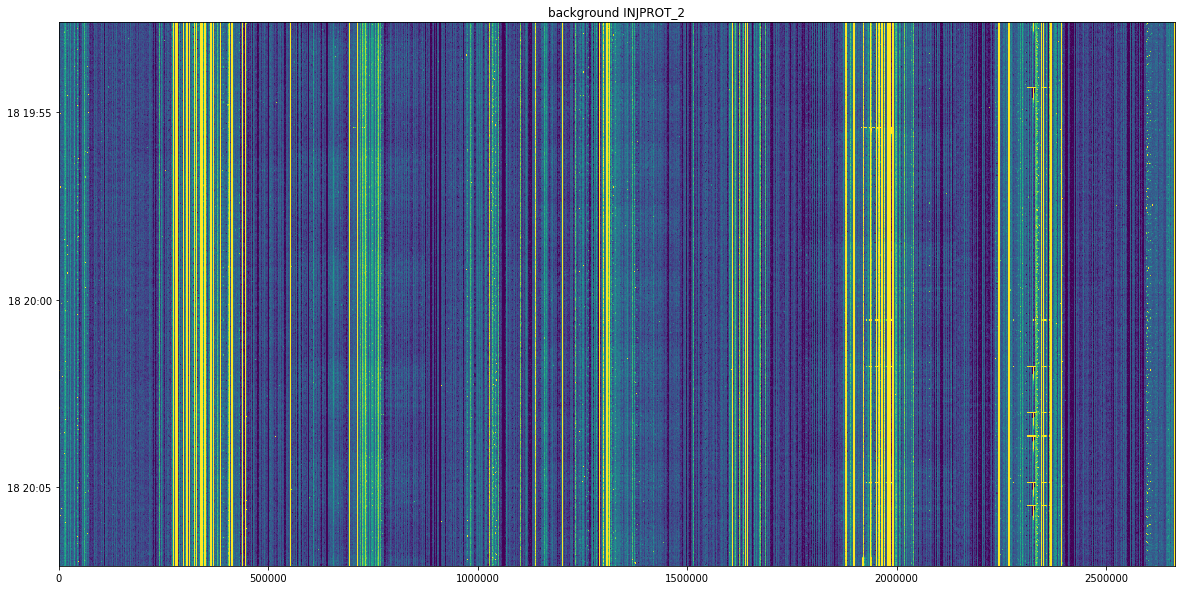

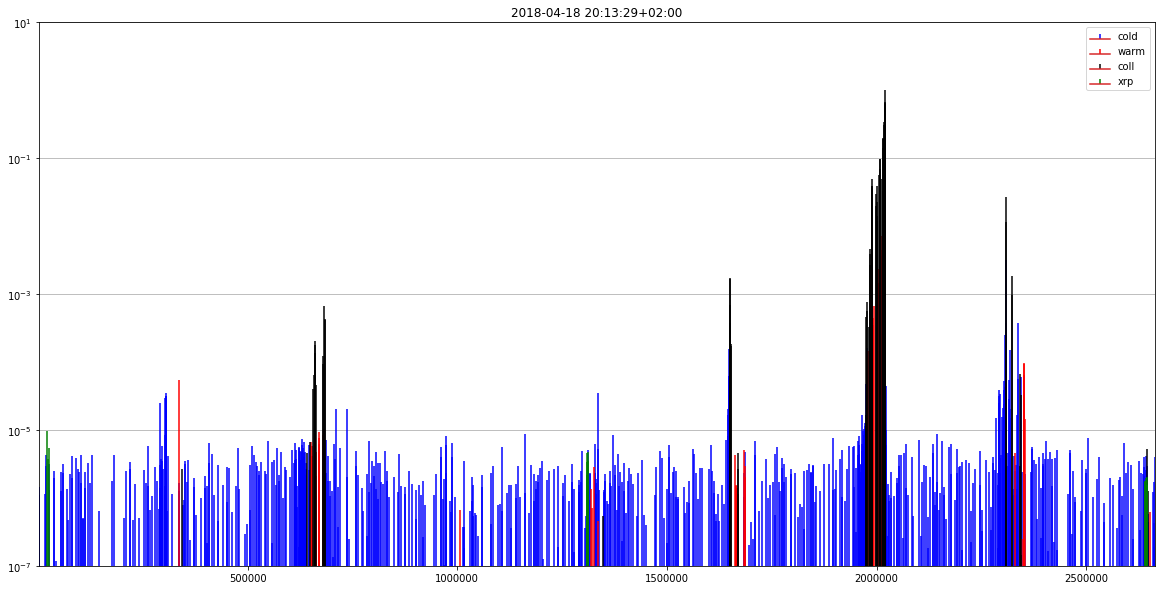

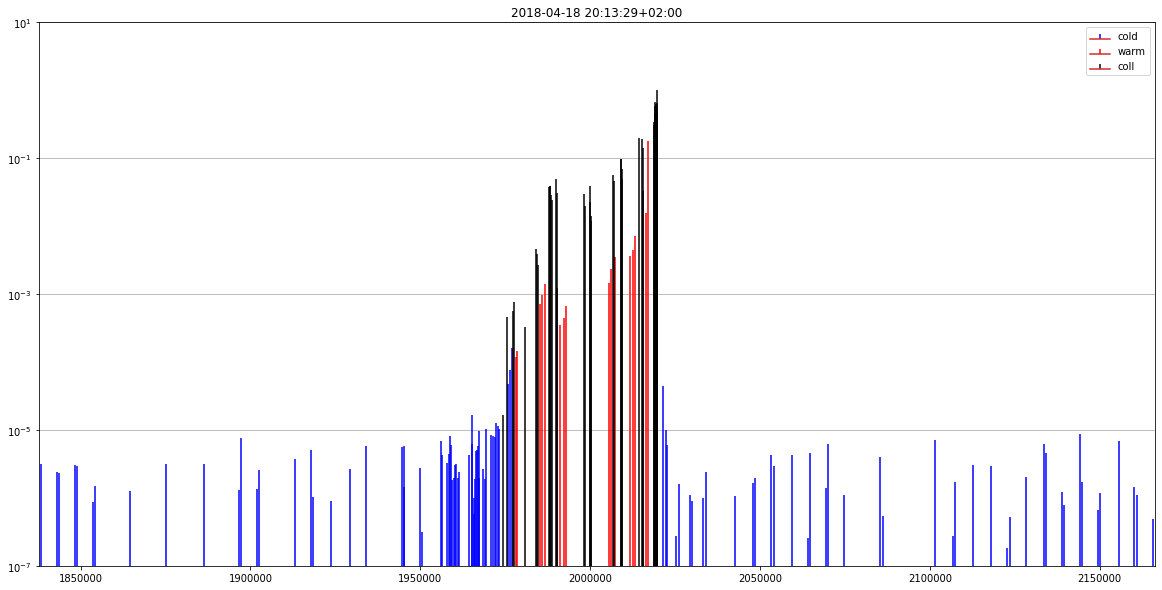

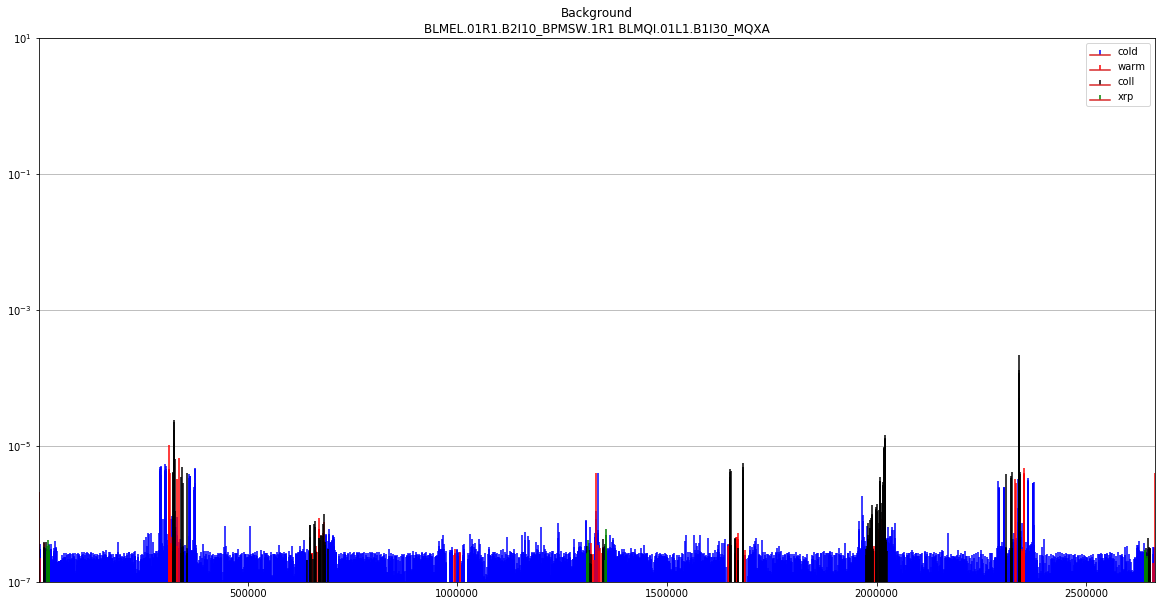

In [6]:
for trigger in ts:
    t = pd.to_datetime(trigger['datetime']).tz_localize('Europe/Zurich')
    BLM_data = fetcher.from_datetimes(t - look_back, t + look_forward)
    BLM_bg = fetcher.bg_from_ADT_trigger(t)
    
    BLM_data.get_beam_meta('intensity', beam=1).plot()
    BLM_data.plot()
    BLM_bg.plot(title='background {mode}')

    LM = BLM_data.loss_map(datetime=t)
    LM_bg = BLM_bg.loss_map(row=BLM_bg.data.mean())
    LM.set_background(LM_bg)
    
    LM = LM.clean_background().normalize()
    
    LM.beam(trigger['beam']).plot(title=t)
    LM.beam(trigger['beam']).IR(7).plot(title=t)
    LM_bg.plot(title=f'Background\n{LM_bg.data.index[0]} {LM_bg.data.index[-1]}')